<span style="color:#ff6200; ">Section: 10.1.1</span>

<span style="color:#ff6200;">Exercise 10.1</span>

_<span style="color:#ff6200;">Answer:</span>_

In [565]:
# the stock price after one year, is modolled with a log-normal distribution
# this is the distribution that the returns have
# the stock price during the year (so continuously speaking) is determined with
# a normal distribution, this is the distribution that the cumulative gains have until time T

<span style="color:#ff6200;">Exercise 10.3</span>

In [566]:
# WARNING!
# black scholes formula is designed such that t is expressed in years
import numpy as np
from scipy.stats import norm
K = 50
S0 = 50
rf = 10 / 100
vol = 30 / 100
T = 1 / 4
t = 0
d1 = ((vol * (T - t)**0.5)**-1) * (np.log(S0 / K) + (rf + (vol**2) / 2) * (T - t))
d2 = d1 - vol * (T - t)**0.5
C = norm.cdf(d1)*S0 - norm.cdf(d2)*K*np.e**(-rf*(T - t))
P = K*np.e**(-rf*(T - t)) - S0 + C

_<span style="color:#ff6200;">Answer:</span>_

In [567]:
C, P, d1, d2

(3.610445066084015, 2.3759406675006467, 0.2416666666666667, 0.0916666666666667)

<span style="color:#ff6200;">Exercise 10.4</span>

Text(90, 5, '$K_{2}$')

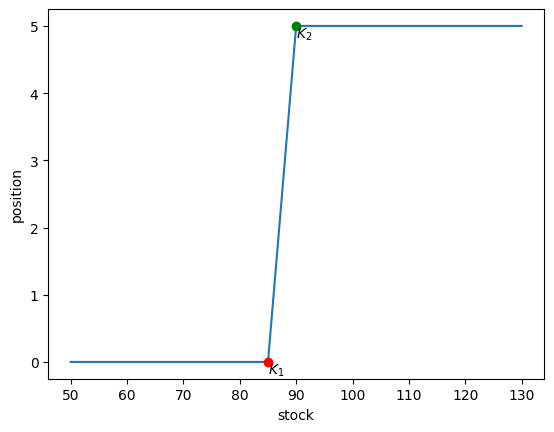

In [568]:
import matplotlib.pyplot as plt

K = 85
S0 = 83
rf = 3.8 / 100
vol = 30 / 100
T = 1 / 4
t = 0
d1 = ((vol * (T - t)**0.5)**-1) * (np.log(S0 / K) + (rf + (vol**2) / 2) * (T - t))
d2 = d1 - vol * (T - t)**0.5
C = norm.cdf(d1)*S0 - norm.cdf(d2)*K*np.e**(-rf*(T - t))
P = K*np.e**(-rf*(T - t)) - S0 + C

def payoff(S, K):
    return max(0, S - K)

x = [i for i in range(50, 130+1)]
y = [payoff(s, K) - payoff(s, 90) for s in x]
plt.plot(x, y)
plt.xlabel("stock")
plt.ylabel("position")

plt.plot(K, payoff(K, K) - payoff(K, 90), 'ro')
plt.text(K, payoff(K, K) - payoff(K, 90), '$K_{1}$', ha='left', va='top')

plt.plot(90, payoff(90, K) - payoff(90, 90), 'go')
plt.text(90, payoff(90, K) - payoff(90, 90), '$K_{2}$', ha='left', va='top')


_<span style="color:#ff6200;">Answer:</span>_

In [569]:
C, P, d1, d2, norm.cdf(-d2)

(4.422463716022655,
 5.6187872236691945,
 -0.02040432462479041,
 -0.1704043246247904,
 0.5676539143373436)

<span style="color:#ff6200;">Exercise 10.5</span>

In [570]:
K = 40
S0 = 38
rf = 16 / 100
vol = 35 / 100
T = 1 / 2
t = 0
d1 = ((vol * (T - t)**0.5)**-1) * (np.log(S0 / K) + (rf + (vol**2) / 2) * (T - t))
d2 = d1 - vol * (T - t)**0.5
C = norm.cdf(d1)*S0 - norm.cdf(d2)*K*np.e**(-rf*(T - t))
P = K*np.e**(-rf*(T - t)) - S0 + C


_<span style="color:#ff6200;">Answer:</span>_

In [571]:
norm.cdf(d2), norm.cdf(-d2)

(0.496907797501081, 0.503092202498919)

<span style="color:#ff6200;">Exercise 10.6</span>

In [572]:
K = 40
S0 = 40
rf = 15 / 100
vol = 25 / 100
T = 2
t = 0

_<span style="color:#ff6200;">Answer:</span>_

In [573]:
# they are log-normally distributed, therefore
((rf - 0.5 * vol**2)*T, (vol**2)*T)

(0.2375, 0.125)

<span style="color:#ff6200;">Exercise 10.6</span>

<span style="color:#ff6200; ">Section: 11.1.1</span>

<span style="color:#ff6200;">Exercise 11.1</span>

_<span style="color:#ff6200;">Answer:</span>_

In [574]:
# if we consider the specified portfolio, then, we can understand that this is a butterfly position.
# Thus, we buy one call option with strike price K1, buy another with strike price K3, and sell 2 others
# with strike price K2
#
# Then the total cost of this strategy is c1 + c3 - 2c2 = a, where a is some constant such that a >= 0
# then we have that (c1 + c3)/2 = c2 + a, this mans that c2 <= (c1 + c3)/2. 

<span style="color:#ff6200;">Exercise 11.2</span>

In [575]:
Kc = 50
c = 2 
Kp = 45
p = 3

_<span style="color:#ff6200;">Answer:</span>_

Text(50, -5, '$K_{c}$')

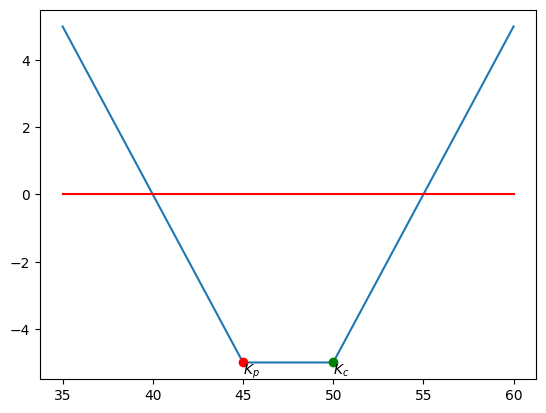

In [576]:
investment_cost = (p + c)
def profit(S):
    return max(S - Kc, 0) + max(Kp - S, 0) - investment_cost

x = [i for i in range(35, 60+1)]
y = [profit(s) for s in x]
plt.plot(x, y)
plt.plot(x, [0 for _ in x], color='r')
plt.plot(Kp, -investment_cost, 'ro')
plt.text(Kp, -investment_cost, '$K_{p}$', ha='left', va='top')
plt.plot(Kc, -investment_cost, 'go')
plt.text(Kc, -investment_cost, '$K_{c}$', ha='left', va='top')

<span style="color:#ff6200;">Exercise 11.3</span>

_<span style="color:#ff6200;">Answer:</span>_

In [577]:
# we know that the put call parity is as the following:
# C - P + dK = S, where dK is the discounted strike price (i.e., today's value of the strike price)
# we have it that d = e^-rT (i.e. discounting happens in continuous compounding form)
# 
# now the bull spread is used when the stock price is expected to rise, so, we buy a call option with
# Kc1, and then sell another one with Kc2 such that Kc2 > Kc1. 
#
# using puts, a similar strategy can be made, buy a low strike price Kp1 put option, and sell a 
# put option with high strike price Kp2. 
#
# We can relate the two in terms of investment costs. Let us do that via the put call parity
#
# C(K1) - P(K1) = S0 - K1*e^-rT
# C(K2) - P(K2) = S0 - K2*e^-rT
#
# we have the above system of equations, we can create the following formula via that
# (C(K1) - P(K1)) - (C(K2) - P(K2)) = (S0 - K1*e^-rT) - (S0 - K2*e^-rT)
# then we get
# (C(K1) - C(K2)) + (-P(K1) + P(K2)) = (C(K1) - C(K2)) - (P(K1) - P(K2)) = K2*e^-rT - K1*e^-rT
# notice that (C(K1) - C(K2)) is the cost for the bull spread using calls, and (P(K1) - P(K2)) is
# the cost for the bull spread using puts. so the difference between the two investments is K2*e^-rT - K1*e^-rT

<span style="color:#ff6200;">Exercise 11.4</span>

In [578]:
# sold
Kp1 = 25
p1 = 2.15
# bought
Kp2 = 29
p2 = 4.75

_<span style="color:#ff6200;">Answer:</span>_

In [579]:
investment = p2 - p1

def payoff(S):
    return max(Kp2 - S, 0) - max(Kp1 - S, 0)
payoff(23), payoff(28), payoff(33)

(4, 1, 0)

<span style="color:#ff6200;">Exercise 11.5</span>

In [580]:
Kc = 50

def payoffstr1(S):
    return S - max(0, S - Kc)

def payoffstr2(S):
    return 2*S - max(0, S - Kc)

def payoffstr3(S):
    return S - 2*max(0, S - Kc)

def payoffstr4(S):
    return S - 4*max(0, S - Kc)

_<span style="color:#ff6200;">Answer:</span>_

In [581]:
x = [i for i in range(25, 75+1)]
y1 = [payoffstr1(s) for s in x]
y2 = [payoffstr2(s) for s in x]
y3 = [payoffstr3(s) for s in x]
y4 = [payoffstr4(s) for s in x]

Text(0, 0.5, 'profit')

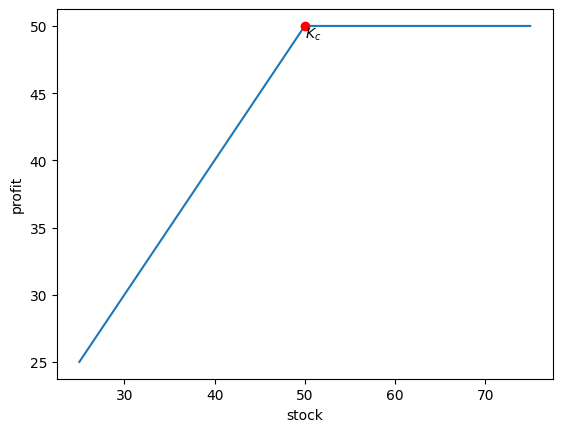

In [582]:
plt.plot(x, y1)
plt.plot(Kc, payoffstr1(Kc), 'ro')
plt.text(Kc, payoffstr1(Kc), '$K_{c}$', ha='left', va='top')
plt.xlabel('stock')
plt.ylabel('profit')

Text(0, 0.5, 'profit')

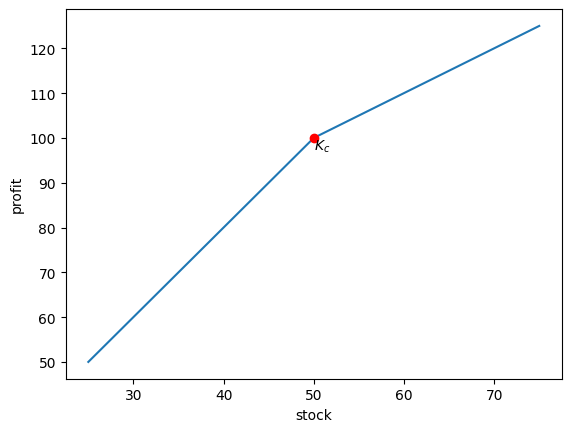

In [583]:
plt.plot(x, y2)
plt.plot(Kc, payoffstr2(Kc), 'ro')
plt.text(Kc, payoffstr2(Kc), '$K_{c}$', ha='left', va='top')
plt.xlabel('stock')
plt.ylabel('profit')

Text(0, 0.5, 'profit')

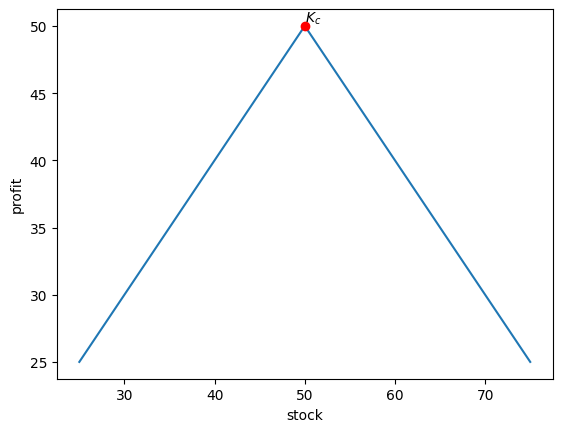

In [584]:
plt.plot(x, y3)
plt.plot(Kc, payoffstr3(Kc), 'ro')
plt.text(Kc, payoffstr3(Kc), '$K_{c}$', ha='left', va='bottom')
plt.xlabel('stock')
plt.ylabel('profit')

Text(0, 0.5, 'profit')

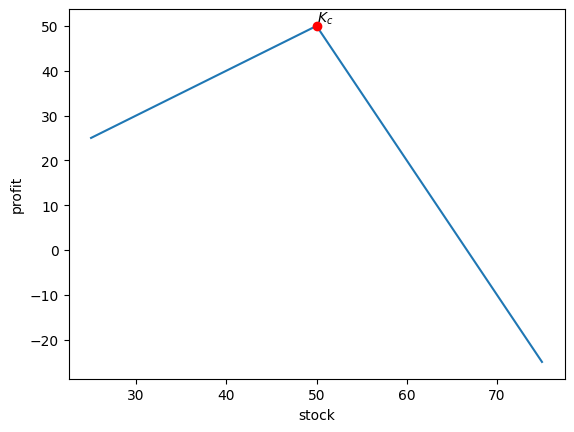

In [585]:
plt.plot(x, y4)
plt.plot(Kc, payoffstr4(Kc), 'ro')
plt.text(Kc, payoffstr4(Kc), '$K_{c}$', ha='left', va='bottom')
plt.xlabel('stock')
plt.ylabel('profit')

<span style="color:#ff6200;">Exercise 11.6</span>

In [586]:
Kc1 = 50
Kp1 = 50
Kp2 = 75
Kc2 = 0.5 * 50
investment_cost = 50
def payoff(S):
    return (max(0, S - Kc1) + max(0, Kp1 - S)) + (max(0, Kp2 - S) + max(0, S - Kc2)) - investment_cost

_<span style="color:#ff6200;">Answer:</span>_

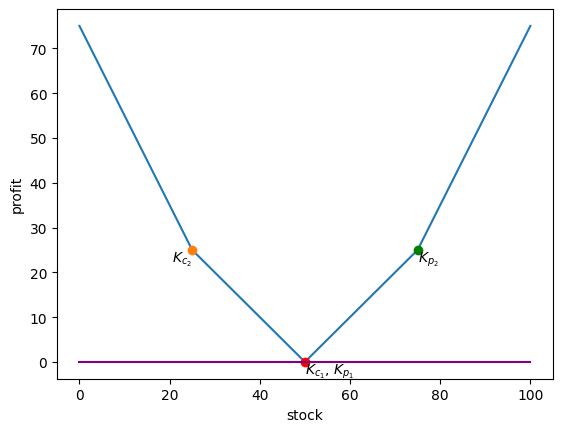

In [590]:
x = [i for i in range(0, 100+1)]
y = [payoff(s) for s in x]
plt.plot(x, y)
plt.xlabel('stock')
plt.ylabel('profit')
plt.plot(Kc1, payoff(Kc1), 'ro')
plt.text(Kc1, payoff(Kc1), '$K_{c_{1}}$, $K_{p_{1}}$', ha='left', va='top')
plt.plot(Kp2, payoff(Kp2), 'go')
plt.text(Kp2, payoff(Kp2), '$K_{p_{2}}$', ha='left', va='top')
plt.plot(Kc2, payoff(Kc2), 'o')
plt.text(Kc2, payoff(Kc2), '$K_{c_{2}}$', ha='right', va='top')
plt.plot(x, [0 for _ in x], color='purple')